In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy 
import scipy.linalg as ln


 ## Задания к теме 6

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
X = np.linalg.solve(A, B)
print("Решение:\n", X)


Решение:
 [-9.2         0.9         6.46666667]


 Решение через обратную матрицу
 X = inv(A)⋅B

 Решение возможно только если определитель A != 0

In [3]:
dA = np.linalg.det(A)
print("det =", dA)
if dA != 0:
    print("Можем найти решение!")
    print("Обратная матрица:")
    A1 = np.linalg.inv(A)
    print(A1)
    X1 = np.dot(A1, B)

    print("Решение:\n", X1)
else:
    print("Система не имеет решения")



det = 59.999999999999986
Можем найти решение!
Обратная матрица:
[[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]
Решение:
 [-9.2         0.9         6.46666667]


 #### 2 - Решение переопределенной СЛАУ
### $x + 2y -z = 4$
### $3x – 4y = 7$
### $8x – 5y + 2z = 12$
### $2x – 5z = 7$
### $11x +4y – 7z = 15$

In [4]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, -5, 0], [11, 4, -7]])
B = np.array([4, 7, 12, 7, 15])
res = np.linalg.lstsq(A, B, rcond=None)
print(res)
print("Псевдорешение:\n",res[0])
print("Сумма квадратов отклонений(невязок): = ", res[1][0])
print("Ранк = ",res[2])


(array([ 1.2179924 , -0.75461019, -0.73460888]), array([13.65696639]), 3, array([14.89650167, 10.4695886 ,  2.73531577]))
Псевдорешение:
 [ 1.2179924  -0.75461019 -0.73460888]
Сумма квадратов отклонений(невязок): =  13.656966393388606
Ранк =  3


 #### 3 - Решение  квадратной матрицы

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A,B.T), axis=1)
print("A:\n",A)
print("C:\n",C)
print("Rank A = ", np.linalg.matrix_rank(A, 0.0001))
print("Rank C = ", np.linalg.matrix_rank(C, 0.0001))
print("Так как Rank A < Rank C то данная СЛАУ не имеет решения!")


A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
C:
 [[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]
Rank A =  2
Rank C =  3
Так как Rank A < Rank C то данная СЛАУ не имеет решения!


In [6]:
print("Изменим систему: A = [[1, 2, 3], [4, 10, 6], [7, 8, 9]]")
A = np.array([[1, 2, 3], [4, 10, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A,B.T), axis=1)
print("A:\n",A)
print("C:\n",C)
print("Rank A = ", np.linalg.matrix_rank(A, 0.0001))
print("Rank C = ", np.linalg.matrix_rank(C, 0.0001))
print("Так как Rank A = Rank С и = числу переменных то система имеет единственное решение!")
X = np.linalg.solve(A, B[0])
print("Решение:\n", X)


Изменим систему: A = [[1, 2, 3], [4, 10, 6], [7, 8, 9]]
A:
 [[ 1  2  3]
 [ 4 10  6]
 [ 7  8  9]]
C:
 [[ 1  2  3 12]
 [ 4 10  6  2]
 [ 7  8  9  1]]
Rank A =  3
Rank C =  3
Так как Rank A = Rank С и = числу переменных то система имеет единственное решение!
Решение:
 [-8.3        -0.9         7.36666667]


 #### 4 - Решение  методом LU разложения ( методм Гаусса )

In [7]:
A = np.array([ [1, 2, 3], [2, 16, 21], [4, 28, 73] ])
B = np.array([12, 2, 1])
P, L, U = ln.lu(A)
print("det A = ", np.linalg.det(A))
print("P = ", P)
print("L = ", L)
print("U = ", U)

print("L*Y = B")
Y = np.linalg.solve(L, B)
print("Y = ", Y)

print("U*X = Y")
X = np.linalg.solve(U, Y)
print("X = ", X)



det A =  432.00000000000017
P =  [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L =  [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U =  [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
L*Y = B
Y =  [12.  -1.  -5.4]
U*X = Y
X =  [ 2.375  -0.5625  0.25  ]


 #### 5. Найдите нормальное псевдорешение недоопределенной системы:

 x + 2y – z = 1

 8x – 5y + 2z = 12

 Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

In [8]:
A = np.array([ [1, 2, -1], [8, -5, 2] ])
B = np.array([1, 12])

def Q(x, y, z):
    return (x**2 + y**2 + z**2)

x = np.linspace(-1, 4, 301)
Y = 10*x - 14
Z = x + 2*Y - 1


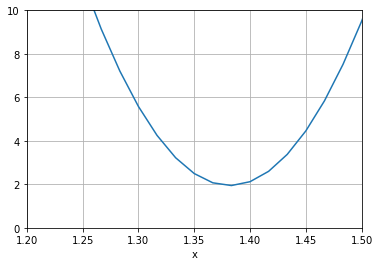

Минимум по X находиться между 1.35 и 1.4


In [9]:
# минимум по X
plt.plot(x, Q(x, Y, Z))
plt.xlabel('x')
plt.ylim(0,10) 
plt.xlim(1.2,1.5)
plt.grid(True)
plt.show()
print("Минимум по X находиться между 1.35 и 1.4")


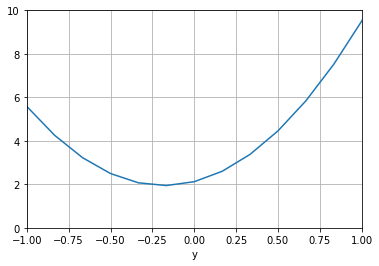

Минимум по Y находиться между 0 и -0.25


In [10]:
# минимум по Y
plt.plot(Y, Q(x, Y, Z))
plt.xlabel('y')
plt.ylim(0,10) 
plt.xlim(-1, 1)
plt.grid(True)
plt.show()
print("Минимум по Y находиться между 0 и -0.25")


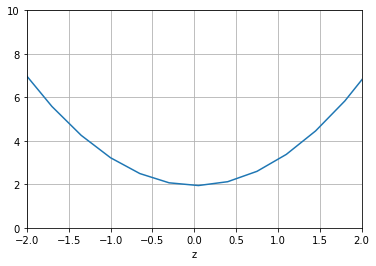

Минимум по Z находиться в районе 0 


In [11]:
# минимум по Z
plt.plot(Z, Q(x, Y, Z))
plt.xlabel('z')
plt.ylim(0,10) 
plt.xlim(-2, 2)
plt.grid(True)
plt.show()
print("Минимум по Z находиться в районе 0 ")


In [12]:
res = np.linalg.lstsq(A, B, rcond=None)
print("Алгебраическое решение: ", res[0])


Алгебраическое решение:  [ 1.38191882 -0.18081181  0.0202952 ]


In [13]:
# from pylab import *
# from mpl_toolkits.mplot3d import Axes3D
# fig = figure()
# ax = Axes3D(fig)
# ax.set_xlim(0, 2)
# ax.set_ylim(-1, 1)
# ax.set_zlim(0,12)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# x = np.linspace(-1, 4, 301)
# Y = 10*x - 14
# Z = 21*x - 28
# # Z = Q(x, 10*x -14, 21*x - 28)
# # ax.plot_surface(X, Y, Z)
# ax.plot(x, Y, Q(x, Y, Z))
# ax.zaxis.axis_name = "hello"
# show() 

 #### 6. Найдите одно из псевдорешений вырожденной системы:

In [14]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)
print("\nПроверка полученных матриц:")
print(np.dot(Q, R))
print(np.dot(Q.T, Q))


[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]

Проверка полученных матриц:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -5.26517217e-16 -2.55176183e-16]
 [-5.26517217e-16  1.00000000e+00  3.37757775e-16]
 [-2.55176183e-16  3.37757775e-16  1.00000000e+00]]


In [15]:
print("\nСоздадим R1 и B1:")
R1 = R[:2, :2]
print(R1)
B1 = np.dot(Q.T, B)[:2]
print(B1)

print("\nПолучим решение и склеим с X2 = 0:")
X1 = np.linalg.solve(R1, B1)
print(X1)
X3 = np.append(X1, 0)
print("\nОдно из псевдорешений:")
print (X3)
print("\nс нормой = ", np.linalg.norm(X3))
np.linalg.norm(X3),  np.linalg.norm(np.dot(A, X3) - B)      



Создадим R1 и B1:
[[-8.1240384  -9.6011363 ]
 [ 0.          0.90453403]]
[-1.21860576e+01  8.54871729e-15]

Получим решение и склеим с X2 = 0:
[1.50000000e+00 9.45096256e-15]

Одно из псевдорешений:
[1.50000000e+00 9.45096256e-15 0.00000000e+00]

с нормой =  1.4999999999999893


(1.4999999999999893, 1.2247448713915885)

 Ищем решение с минимальной нормой

In [17]:
res = np.linalg.lstsq(A, B, rcond=None)
print(res)
X = res[0]
print("\nАлгебраическое решение: ", X)


print("\nс нормой = ", np.linalg.norm(X))
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B)  

# файл конвертирован из питоновского файла

(array([ 1.25,  0.5 , -0.25]), array([], dtype=float64), 2, array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

Алгебраическое решение:  [ 1.25  0.5  -0.25]

с нормой =  1.3693063937629126


(1.3693063937629126, 1.224744871391589)